
### 1. 切換 TensorFlow 版本至 2.x

In [0]:
%tensorflow_version 2.x

## 2. 載入套件及資料集

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# Data Preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### 3. Data Preprocessing

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# 讀取資料
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# 將資料標準化
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

170500096/170498071 [==============================] - 13s 0us/step


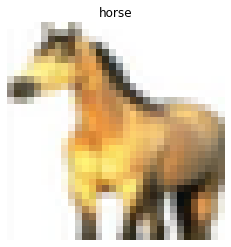

In [7]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

### 5. 建立用於分類A資料集 - CIFAR10的卷積神經網路

 修改部分: 將卷積層的filter數量下修為16, 64, 256，並將全連接層的神經元數量下修至128。

In [0]:
CNN_layers = [Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

In [14]:
og_model = Sequential(CNN_layers+FC_layers)
og_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         147712    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

修改部分: 將optimizer改用SGD，並將learning rate設定為0.06。

再將batch_size下修至100，訓練10次。

In [0]:
og_model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.06),
              metrics=['categorical_accuracy'])

In [16]:
og_model.fit(X_train, y_train,
             batch_size=100, epochs=10,
             validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 4s 8ms/step - loss: 2.1727 - categorical_accuracy: 0.1879 - val_loss: 2.0535 - val_categorical_accuracy: 0.2419
Epoch 2/10
500/500 [==============================] - 4s 8ms/step - loss: 1.9967 - categorical_accuracy: 0.2555 - val_loss: 1.9524 - val_categorical_accuracy: 0.2731
Epoch 3/10
500/500 [==============================] - 4s 8ms/step - loss: 1.8493 - categorical_accuracy: 0.3146 - val_loss: 1.7546 - val_categorical_accuracy: 0.3424
Epoch 4/10
500/500 [==============================] - 4s 8ms/step - loss: 1.7544 - categorical_accuracy: 0.3517 - val_loss: 1.7347 - val_categorical_accuracy: 0.3508
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 1.6722 - categorical_accuracy: 0.3821 - val_loss: 1.6521 - val_categorical_accuracy: 0.3965
Epoch 6/10
500/500 [==============================] - 4s 8ms/step - loss: 1.5891 - categorical_accuracy: 0.4161 - val_loss: 1.6954 - val_categorical_accuracy: 0.3687
Epoc

### 6. 建立B資料集 - CIFAR100的神經網路架構
和A資料集借用卷積層的權重，新增CIFAR100自己的全連接層。
修改項目: 隱藏層增至3層，神經元分別修改為256, 256, 512。

In [22]:
# 讀取資料
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# 將資料標準化
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

169009152/169001437 [==============================] - 13s 0us/step


In [0]:
FC_layers_CF100 = [Dense(units=256, activation='relu'),
                   Dense(units=256, activation='relu'),
                   Dense(units=512, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [24]:
new_model = Sequential(CNN_layers+FC_layers_CF100)
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         147712    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

### 7. 進行Transfer Learning (Frozen Situation)

In [0]:
for layer in CNN_layers:
    layer.trainable = False

In [26]:
new_model.summary()
# 檢視借來的權重是否確實凍結

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         147712    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

修改部分: 同樣將optimizer改用SGD，並將learning rate設定為0.06。

此次將batch_size上修至150，同樣訓練10次。

In [29]:
new_model.compile(loss='categorical_crossentropy', 
                    optimizer=SGD(lr=0.06),
                    metrics=['categorical_accuracy'])
new_model.fit(U_train, v_train,
                batch_size=150, 
                epochs=10,
                validation_data=(U_test, v_test)
                )

Epoch 1/10
334/334 [==============================] - 2s 7ms/step - loss: 3.1743 - categorical_accuracy: 0.2239 - val_loss: 3.2287 - val_categorical_accuracy: 0.2106
Epoch 2/10
334/334 [==============================] - 2s 6ms/step - loss: 3.1452 - categorical_accuracy: 0.2267 - val_loss: 3.2149 - val_categorical_accuracy: 0.2130
Epoch 3/10
334/334 [==============================] - 2s 6ms/step - loss: 3.1179 - categorical_accuracy: 0.2320 - val_loss: 3.2331 - val_categorical_accuracy: 0.2040
Epoch 4/10
334/334 [==============================] - 2s 7ms/step - loss: 3.0919 - categorical_accuracy: 0.2359 - val_loss: 3.1906 - val_categorical_accuracy: 0.2116
Epoch 5/10
334/334 [==============================] - 2s 7ms/step - loss: 3.0680 - categorical_accuracy: 0.2412 - val_loss: 3.2491 - val_categorical_accuracy: 0.2042
Epoch 6/10
334/334 [==============================] - 2s 7ms/step - loss: 3.0464 - categorical_accuracy: 0.2454 - val_loss: 3.1191 - val_categorical_accuracy: 0.2281
Epoc

### 8. 進行簡單的預測

In [0]:
result = model.predict_classes(U_test)

In [0]:
def my_predict(n): 
    print('New Model的預測是：', name_list[result[n]])
    X = U_test[n].reshape(32,32,3)
    plt.imshow(X)

New Model的預測是： automobile


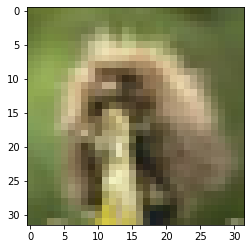

In [39]:
my_predict(5055)

##### 觀察: 將遷移學習後的神經網路做訓練(不改變借來的權重)，發現效果並不好，正確率下降不少(50% → 26%)